In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#data = work.updated_world_indices(category = 'All', timeframe='Weekly')
#hmap = data[0]
#rawdata = data[1]
#rawdata.to_excel('rawdata.xlsx', sheet_name='Equities')

# Weekly Global Market Report


<div style="font-size: 15px">
<br>
    <b> Date: </b>  17<sup>th</sup> October, 2020
</div>

<a id ="content"></a>
## Contents:

1. [World Equities](#eq)
2. [Fixed Income](#fi)
3. [Currencies (FX)](#cur)
4. [Commodities](#comd)
5. [Charts of the Week](#charts)
6. [Key Economic Events - Next Week](#eco)

# World Equity Markets Heatmap

In [4]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def world_map(timeperiod):
    """
    """
    iso = pd.read_excel('World_Indices_List.xlsx', sheet_name='iso')
    iso.set_index('Country', inplace=True)
    rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
    rawdata = rawdata.drop(['China A50', 'SmallCap 2000', 'BSE Sensex', 'Euro Stoxx 50', 'Nasdaq', 'KOSDAQ', 'RTSI', 'DJ Shanghai', 'SZSE Component'], axis=0)
    data2 = rawdata.merge(iso['iso_alpha'], on='Country')
    data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']] = data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']].round(4)*100

    df = data2
    for col in df.columns:
        df[col] = df[col].astype(str)

    df['text'] = 'Return: '+df[timeperiod]+'%' + '<br>' \
                  'Country: '+ df['Country'] + '<br>' \

    fig1 = go.Figure(data=go.Choropleth(locations=df['iso_alpha'], z=df[timeperiod].astype(float).round(2), colorscale='RdYlGn', autocolorscale=False,
        text=df['text'], colorbar_ticksuffix = '%', colorbar_title = "Return"))



    return fig1.update_layout(width=950, height=500, margin=dict(l=0,r=0,b=0,t=0,pad=1),
                        xaxis=dict(scaleanchor='x', constrain='domain'), coloraxis_colorbar_x=1)

style = {'description_width': 'initial'}
interact(world_map,
             timeperiod = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Return Category: '));

interactive(children=(Dropdown(description='Return Category: ', index=2, options=(('Weekly LCL Returns', 'Chg …

<a id ="eq"></a>
## World Equities

### Local Currency & USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [5]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def hmap(sortby):
    hmap = rawdata.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}",'Chg': "{:.2f}", 'Chg (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}", '$ Chg (%)': "{:.2%}", '$ Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Chg', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', index=2, options=(('Weekly LCL Returns', 'Chg (%)'), (…

In [6]:
def perf(tf):
    rawdata1 = rawdata.sort_values(by=tf, ascending=False)
    weekly_usd = rawdata1
    weekly_usd = ((pd.DataFrame(weekly_usd[tf]*100)).dropna().sort_values(by=tf, ascending=False))
    fig = px.bar(weekly_usd, color=weekly_usd.values, text=rawdata1['Country'], color_continuous_scale='rdylgn')

    fig.update_layout(title = 'World Indices Performance (%) in US Dollar Terms (EOD)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#282828"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x', width=1200, height=600)
    fig.update_traces(hovertemplate='Index: %{x} <br>Country: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf,
             tf = widgets.Dropdown(options=(('Weekly USD','$ Chg (%)'),('YTD USD','$ Chg YTD (%)')),
                                                   value = '$ Chg (%)', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=(('Weekly USD', '$ Chg (%)'), ('YTD USD', '$…

**HIGHLIGHTS**:

- **Wall Street** closed mixed on Friday with the Dow rising after three consecutive drops, as economic data surpassed expectations but fiscal uncertainty lingers. **Retail sales jumped 1.9% in September and soundly beat consensus estimates of 0.7%**, while consumer confidence for October also came in better than expected. On a more negative note, industrial output unexpectedly contracted in September. Elsewhere, Pfizer said it would apply for emergency use of its Covid-19 vaccine as soon as it reaches safety milestones. 


- On the corporate side, **Boeing shares outperformed after the European Union Aviation Safety Agency said the 737 Max jet was safe to fly again**. The Dow Jones added 112 points or 0.4% to 28,606, while the S&P 500 finished near the flat line at 3,484. In contrast, the Nasdaq lost 42 points or 0.4% to 11,672. During the week, the Dow gained 0.1% and the S&P 0.2%, notching their third straight weekly gain. The Nasdaq added 0.8%, posting a four-week winning streak.


- **European stocks** recorded their best session in nearly three weeks on Friday, recovering from a steep sell-off in the previous day, after Pfizer said it expects to provide safety data and file for authorization of its COVID-19 vaccine as soon as November. Elsewhere, Brexit talks ended without any signs of a trade agreement, with British PM Johnson urging the UK to prepare for no deal and EU Commission president Ursula von der Leyen saying that negotiations would continue next week. On the corporate front, stronger-than-expected earnings results from Daimler and Volvo helped auto stocks. The DAX 30 added 1.6% to 12,909, the CAC 40 jumped 2%, the FTSE 100 rose 1.5%, the FTSE MIB advanced 1.7% and the IBEX 35 gained 0.5%. For the week, however, stocks posted their first weekly decline in three, with the DAX 30 falling more than 1%, amid lockdown fears.


- The **CAC 40 (France)** climbed 98 points, or 2% on Friday, boosted by corporate earnings and sharp gains in the auto sector. **New passenger car registrations in the European Union rose for the first time in 2020 and Daimler and Volvo posted stronger-than-expected earnings results**. Among single stocks, LVMH shares rose sharply, as the revenue was up 12% compared to a year ago. On the week, the index was down 0.2% to 4,936 this week, reversing a 2.5% gain from the previous week as investors remain concerned about a second wave of coronavirus infections. On Thursday, France reported a record 30K new cases days after the number of people being treated in the intensive care units for COVID-19 hit the highest level since late May. As a result, the **government was forced to impose a 9pm-6am curfew in Paris and eight other cities**.



- The **FTSE MIB (Italy)** lost 1% to 19,390 during the last week, the first weekly drop in four and reversing from a 2.8% gain in the previous period. Traders worried over Europe’s recovery as several countries like Germany, the UK, France and Spain reimposed lockdown measures due to a resurgence in coronavirus cases. Italy reported a record 8,803 new coronavirus infections on Thursday, bringing the country’s total to 381,602 and up from Wednesday’s record of 7,332. Considering Friday only, the FTSE MIB gained 324 points, or 1.7%.



- The **IBEX 35 (Spain)** added 33 points, or 0.5% to close at 6,850 on Friday, as optimism over a potential Covid-19 vaccine offset concerns over rising coronavirus cases and renewed restrictions in Europe. Spain reported 13,318 new Covid-19 cases on Thursday, the second-highest daily figure since the end of June. Meantime, **Spanish authorities continue to expand restrictions on mobility, as more than thirty municipalities in five autonomous communities will be subject to perimeter confinement this weekend to fight a growing outbreak**. On the economic front, the government expects a recession of 11.2%, the worst since the civil war, due to the impact of the coronavirus pandemic. On the corporate front, **Spanish pharmaceutical PharmaMar gained more than 3%, after the company reported positive results of its drug trial against COVID-19. For the week, the IBEX 35 lost 1.5%.**



- The **FTSE 100 (U.K)** climbed 1.5% to close at 5,920 on Friday, posting its biggest daily percentage gain since September 28th and recovering from a steep sell-off in the previous session. Market sentiment was supported by hopes that Pfizer could apply for a US emergency use of its coronavirus vaccine as soon as November, while a weaker pound boosted export-oriented firms. **On the Brexit front, British PM Boris Johnson urged UK businesses to prepare for no deal**. Later on, EU Commission president Ursula von der Leyen announced that negotiations would continue next week, but a spokesperson for the UK prime minister said talks with the EU were over unless the bloc changed its negotiating position. **For the week, the FTSE 100 lost 1.6%** as several countries across Europe were forced to impose tougher lockdown restrictions to curb the spread of the pandemic. Among others, **London will enter a tighter COVID-19 lockdown from midnight on Friday**.


- **China has suspended purchases of Australian coal**, according to people familiar with the order, as Beijing continues to tightly control imports of the fuel amid soured political relations between the two countries. China lashed out at Canada after Prime Minister Justin Trudeau vowed to stand up to Beijing’s “coercive diplomacy”. Hong Kong demanded the U.S. withdraw its pending regulation to label goods manufactured in the city as “Made in China,” expressing a “strong objection” to the requirement at a meeting of the World Trade Organization.



- **Thailand declared a state of emergency** in the capital after tens of thousands of anti-government protesters surrounded the prime minister’s office demanding greater democracy and less power for the monarchy. Tens of thousands of anti-government protesters staged a rally for a second day in Bangkok on Thursday, defying a state of emergency.



- **Canada**’s S&P/TSX Composite Index lost 0.4% to 16,439 on Friday, as disappointing domestic data and a drop in both oil and gold prices overshadowed a strong retail sales report in the US and Pfizer’s nearing application for an emergency use for its Covid-19 vaccine candidate. On the data front, official figures showed **manufacturing sales in Canada fell 2% over a month earlier in August, more than market expectations of a 1.4% decrease and marking the first decline in four months**. WTI crude prices declined 0.5% to USD 40.7 a barrel and spot gold dropped below USD 1900 per ounce. **During the week, the TSX lost 0.7%.**



- **Mexico’s IPC** lost 0.5% on Friday. On Friday, the **AMLO administration informed that more than 100 thousand formal jobs were created in the first half of October following net gains of 90 and 110 thousand in August and September, respectively**. The IMF revised during the week its to -9% its Mexican GDP growth forecast for 2020 from -10.5% in June. **During the week, the IPC lost 1.6%**. Mexico’s ruling Morena party risks rupture after the two main candidates in an internal leadership contest exchanged accusations that the other is trying to illegitimately take over the movement. President Andres Manuel Lopez Obrador said he won’t interfere in the leadership struggle within his party. **Mexico’s economy is performing close to the central bank’s most optimistic scenario of an 8.8% contraction in 2020, Governor Alejandro Diaz de Leon said.**



- **Brazil**’s Ibovespa lost 0.8% on Friday. On the domestic corporate side, shares of steelmaker CSN rose after beating Q3 earnings estimates. **During the week, the Ibovespa advanced 0.8%.** Brazil’s economic activity index expanded 1.06% in August, compared with the 1.7% estimate. The government is mulling a smaller social program as it struggles to make it fit in next year’s budget, Folha de S. Paulo reported. **Brazil’s Lower House Speaker Rodrigo Maia said he is discussing with Economy Minister Paulo Guedes the creation of a new tax; Guedes said taxes on digital transactions were discussed by G-20 representatives.**



- **South Africa** won’t be able to meet its finance ministry’s debt targets and it may be undesirable for it to attempt to do so when the economy is being battered by the fallout from the coronavirus, according to an advisory panel appointed by President Cyril Ramaphosa. **South African factory output contracted for a fifteenth month in August even as lockdown measures were eased.** President Cyril Ramaphosa **unveiled a plan to revive the economy, with job creation, increased infrastructure investment and enhanced energy security among its key tenets.**


**ECONOMIC DATA WATCH**

- On the data front, US initial jobless claims came in higher than expected at 898k last week; the number has been holding at circa 800k-900k for seven weeks now, fueling concerns that job growth is slowing and companies are still cutting employments. CPI inflation was a tad higher at 1.4% YOY but core CPI was steady at 1.7% YOY, indicating subdued price pressure.



- Elsewhere, UK job market deteriorated as unemployment rate jumped to 4.5% in the three months to August while the economy shed 153k jobs. The worst are yet to come given that the job protection program expires at the end of October. Eurozone industrial production rose a mere 0.7% MOM, indicating that output is normalizing. Same went to Japanese output which recorded a small 1% growth. Australia economy lost 29.5k jobs in September and unemployment rate rose to 6.9% thanks to the lockdown in Victoria. RBA governor Lowe signals that the central bank could cut rate to 0.1%. China CPI inflation eased considerably in September thanks to lower food inflation. Singapore 3Q GDP rebounded by 7.9% QOQ and MAS maintained its policy.



**DATA RELEASES NEXT WEEK**

- The week kicks off with China’s 3Q GDP data alongside its other key economic indicators namely industrial production, retail sales and fixed investment. This expected to garner huge attention, offering us latest assessment of the country’s state of recovery. Other data include New Zealand Services PMI, UK Righmove House Price Index and US NAHB Housing Market Index.


- On the following day, the RBA will publish its latest meeting minutes and this should reinforce the central bank’s dovish stance. China’s PBOC is also expected to announce its latest 1-year loan prime rate decision. US homebuilding data (housing starts and building permits) meanwhile are set to be released in the evening. On Wednesday, Australia Westpac Leading Index and New Zealand credit card spending are due early in the morning, followed by Malaysia CPI and UK CPI.


- On Thursday, the US Federal Reserve is also publishing its Beige Book, this should give us more insights into the health of US economy nationwide. Hong Kong CPI, Eurozone consumer confidence, US initial jobless claims as well as existing home sales are also among the key data to watch out for. 


- The week wraps up with the preliminary readings of Markit PMI (both manufacturing and services) for key developed economies namely, the US, Eurozone, UK and Japan. Other than that, we also have CPI data from New Zealand, Japan as well as Singapore. UK consumer confidence and retail sales data are also in the pipeline on Friday.

**STOCKS THAT DEFINED THE WEEK**


**JP MORGAN CHASE & CO.**

-  America’s biggest banks are proving that Wall Street can make money even in the middle of a pandemic. JPMorgan said Tuesday that third-quarter profit rose 4% from a year ago. **Goldman Sachs Group Inc. said third-quarter profit nearly doubled**, and **Morgan Stanley on Thursday said quarterly profit rose 25% from a year ago**. Many executives were quick to warn, however, that the economy isn’t out of the woods just yet. JPMorgan shares fell 1.6% Tuesday.

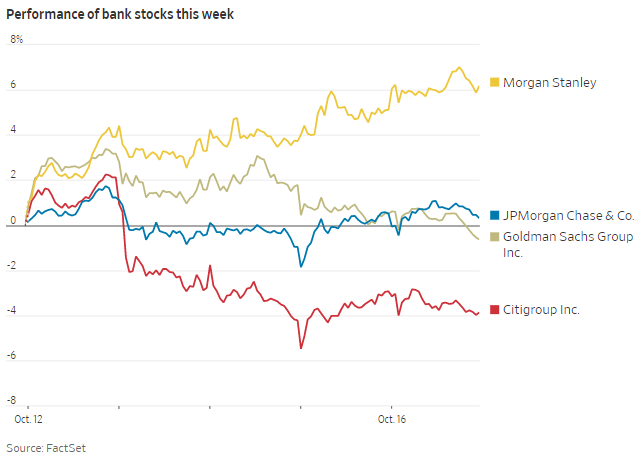

**PILGRIM'S PRIDE CORP.**

- The Justice Department plucked the first feather in its ongoing probe of the U.S. chicken industry. Pilgrim’s Pride, the second-largest U.S. chicken processor by sales, said Wednesday that it had agreed to a plea deal with federal prosecutors to resolve price-fixing charges. The company will pay a fine of USD 110.5 million, and a guilty plea will make it the first company to admit in court to what prosecutors allege was a seven-year effort across much of the U.S. chicken industry to inflate prices and suppress competition. It’s the latest victory for the Justice Department in its continuing antitrust scrutiny of major food suppliers. Pilgrim’s Pride shares rose 5.7% Wednesday.

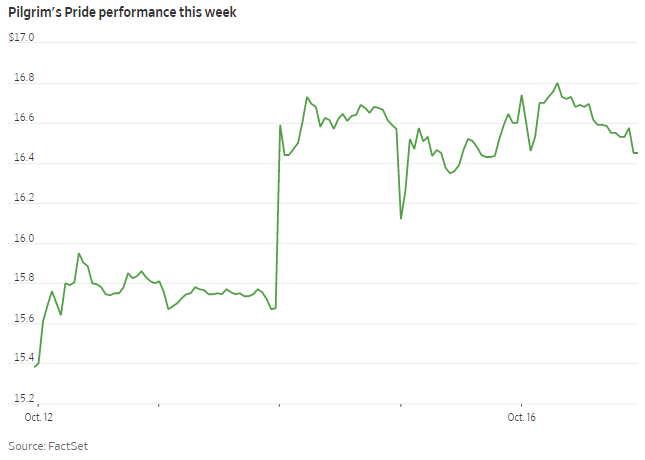

**JOHNSON & JOHNSON**

- The race toward a coronavirus cure hit a new hurdle this past week after a second vaccine trial was paused due to a safety concern. **A study volunteer’s unexplained illness prompted Johnson & Johnson on Monday to pause further dosing in all clinical trials of its experimental Covid-19 vaccine**. An independent committee is reviewing the subject’s illness, and J&J said it hopes to know within days whether it can resume testing. Drugmakers have developed their Covid-19 shots remarkably quickly, and J&J’s vaccine is one of the most advanced in development. Eli Lilly & Co. on Tuesday also said it would pause its antibody drug trial due to a safety concern. Johnson & Johnson shares fell 2.3% Tuesday.

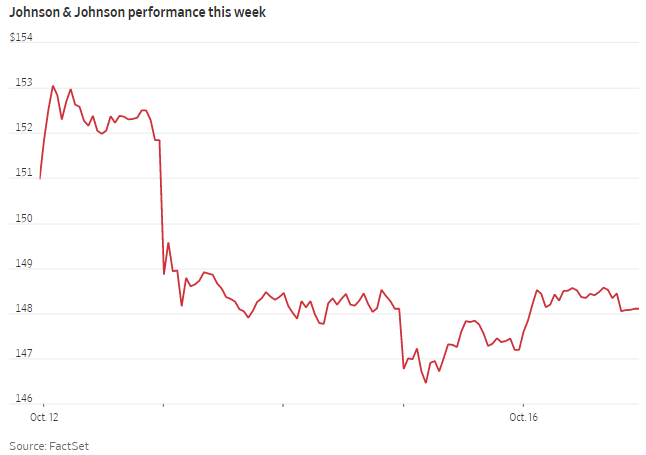

**BLACKROCK INC.**

- The world’s largest money manager just got even bigger. **BlackRock said Tuesday that quarterly profit rose 22% and assets surged to a record USD 7.8 billion**, increasing its dominance in the industry and forcing weaker rivals to play defense. The company also announced a new investment in the electric-vehicle sector, the latest investor bet on new technology upending the auto industry. Electric-vehicle startup Arrival Ltd. said it has raised USD 118 million from funds managed by BlackRock. This latest investment comes after the New York-based asset manager topped up its holding in July of Rivian Automotive LLC, an electric pickup-truck startup backed in part by Ford. BlackRock shares rose 3.9% Tuesday.

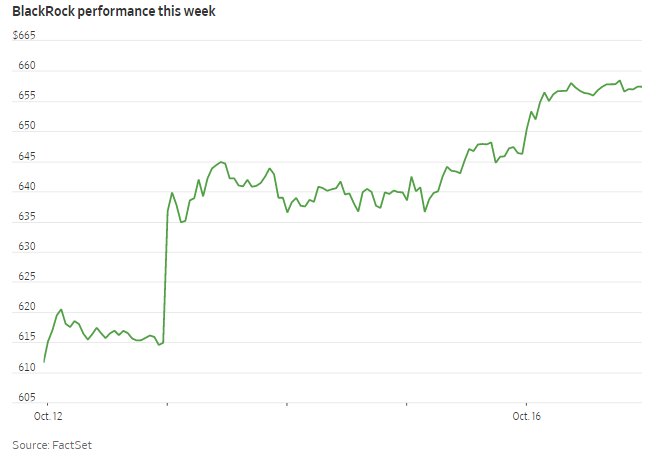

[Back to Table of Contents](#content)

<a id ="fi"></a>
## Fixed Income

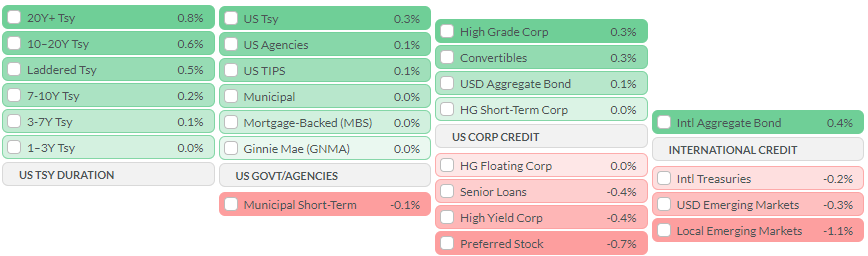

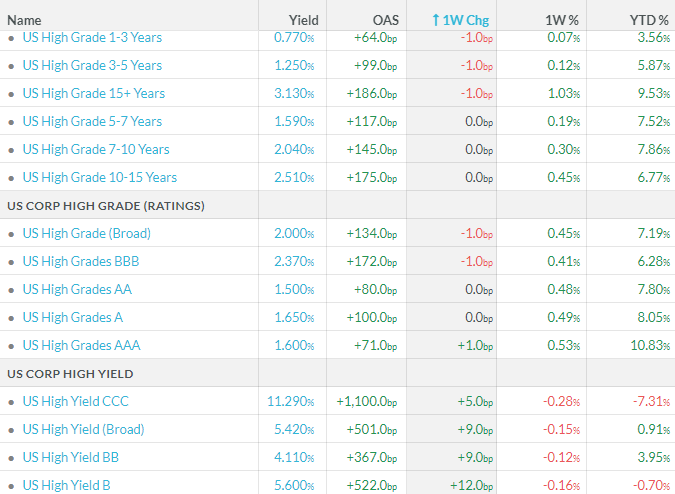

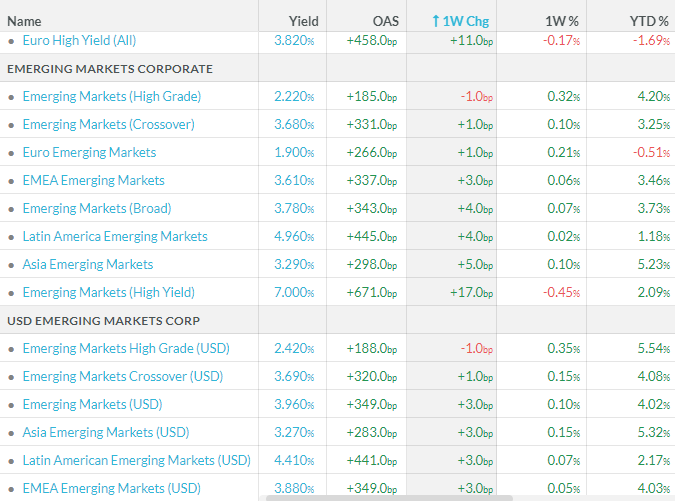

**HIGHLIGHTS**


- US Treasuries reacted mainly to running updates and news over the proposed economic stimulus bill which has yet to be implemented. Overall benchmark yields declined between 1-8bps across with the longer-ends richer as the curve bull-flattened. The 2Y benchmark; reflective of interest rate predictions edged 1bps lower at 0.14% whilst the much-watched 10Y (which traded within a tighter 0.72%-0.79% range); rallied 6bps at 0.73%. Reports of an increase in first-time claims for US unemployment benefits for week ending 10th Oct also lent a bid to bonds. Separately the US debt pile has now rocketed to ~USD 20 trillion from earlier estimates of about USD 13 trillion in 2015. Expect bond trading activity and some volatility in UST levels to be influenced next week by key developments in Washington pertaining to the proposed stimulus bill and events leading up to the Nov presidential election.


- There are two narratives currently driving risk-on sentiment in bond markets: fiscal stimulus and a Covid vaccine. The US presidential election outcome will likely have an impact on the scale and timing of US fiscal stimulus measures and could also raise volatility. Polls are pointing towards a victory for Joe Biden and for Senate Democrats (a blue wave). While the accuracy of polling, particularly in light of the 2016 election outcome, is never certain, Biden has gathered a stronger lead than Clinton had at this stage in the campaign. 



- As this year has progressed the narrative surrounding a Biden presidency has flipped, with previous concerns around increased regulation and higher corporate taxes replaced by hopes that a large fiscal stimulus programme would be put in place relatively quickly after the election (whereas issues such as tax reform would take longer to implement). Besides the US election, vaccine developments are also being watched closely by investors. An effective Covid vaccine should eventually allow inperson services to complete the recovery already largely achieved by retail sales and manufacturing. While we can’t predict the timing, we do know that advanced vaccine trials are still targeting an efficacy signal by late October or early November.


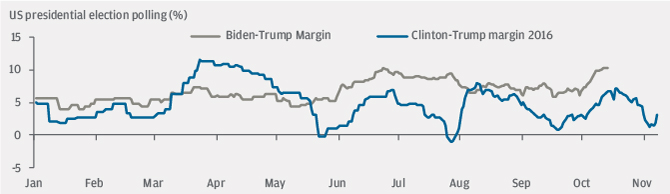
*Source: Real Clear Politics; data as of 13 October 2020.



- Investors have already been shifting gears in their portfolios as markets have started to price in a Biden victory and a vaccine, with duration positioning surveys suggesting a move broadly to a more neutral, or short position. If a Biden victory or blue wave does occur, supply of US Treasuries would be expected to increase in order to fund the touted fiscal spending measures. Overall, a larger pool of debt with less buying appetite from investors should allow bond yields in the US to drift higher.

**CENTRAL BANK WATCH**

- **India** expanded its market borrowing plan for a second time this year to an unprecedented 13 trillion rupees (USD 177 billion), a move that’s likely to roil the nation’s bond market. **Indonesia**’s central bank kept its policy rate unchanged as it uses other measures, such as government bond purchases, to help shore up the economy. **South Korea**’s central bank left its key rate unchanged amid signs a resurgence of the coronavirus is waning and exports and inflation are picking up. **Governor Lee Ju-yeol said it wasn’t time to consider full-scale quantitative easing.**


- **Zambia skipped an interest payment on its debt, moving closer to becoming the first African nation to default on dollar bonds since the onset of the coronavirus pandemic.** **Foreign investors bought Chinese bonds worth at least 140.5 billion yuan (USD 21 billion) in September, a sixth straight monthly increase.** China’s central bank added more funds than expected to its banking system to support the economic recovery from the pandemic and assist companies to pay taxes due in the coming week. Demand for Chinese dollar bonds sank to the lowest level since a pandemic-induced selloff roiled global credit markets in March, a sign of investor fatigue after a record order splurge. China’s consumer inflation slowed in September, driven by a moderation in food price gains.


- **Egyptian Real Yields Are "Really" High** and look attractive with a stable FX rate in the EGP. Egypt 3M bill yield is currently at 13.212% while 3M hedging costs in the Forward Markets (Bloomberg FRD Function) comes to 9.73% p.a. thus providing a **3.47% p.a. USD Yield with negligible duration/credit risk**.

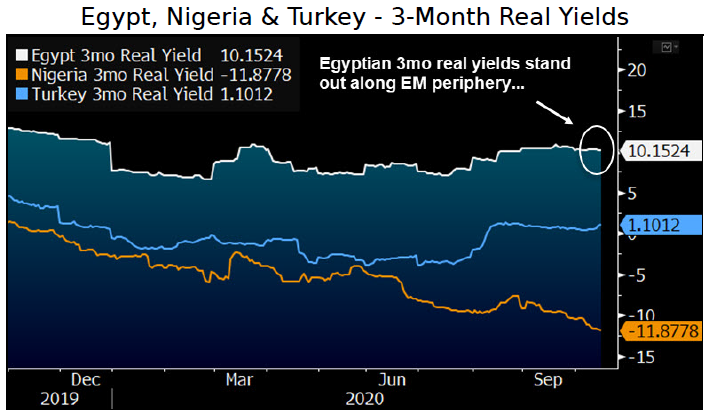

[Back to Table of Contents](#content)

<a id ="cur"></a>
## Currencies (FX)

In [26]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [27]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [29]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns))
    return hmap
    
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

### Top Currencies Live Cross Rates

In [11]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/forex-cross-rates/" rel="noopener" target="_blank"><span class="blue-text">Forex Rates</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-forex-cross-rates.js" async>
  {
  "width": 770,
  "height": 400,
  "currencies": [
    "EUR",
    "USD",
    "JPY",
    "GBP",
    "CHF",
    "AUD",
    "CAD",
    "NZD",
    "CNY"
  ],
  "isTransparent": false,
  "colorTheme": "light",
  "locale": "en"
}
  </script>
</div>
<!-- TradingView Widget END -->
""")

In [12]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'], color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**

> Dollar gained strength and treasuries advanced further as risk appetite waned as hope for U.S. stimulus before election faded; stock market weakened across the regions. 10y-UST yield retreated by 4bps to 0.73% level. Stimulus negotiation and covid-19 headlines will continue to drive the direction of the financial market. China’s GDP data in the coming week will be key to watch to assess the path of recovery.

> AUD was the top loser for the week, losing 1.25% against USD as RBA Governor Lowe raised questions on effectiveness of buying longer dated bonds on jobs growth. Surging Covid-19 cases in the Euro zone weakened EUR by 1% as concerns on economic growth intensified. Pound whipsawed during week driven by headlines related to Brexit and stricter movement control.


- **USD:** : The dollar index gained 0.7% over the week to settle at 93.7 against a basket of currencies on Friday, its first weekly rise in three. Concerns about rising COVID-19 cases, stricter lockdown restrictions in Europe, Brexit uncertainty, and an attempt from the PBoC to depreciate the yuan supported the greenback. At the same time, investors awaited news about a stimulus package in the US and digested a weaker-than-expected jobless claims reported released on Thursday. For the week ahead, retail sales, industrial production and Markit PMI figures will likely be key market focus on fundamentals.



- **EUR**: The euro settled at 1.172 on Friday, booking a 0.4% weekly fall, amid concerns about Europe's economic recovery as several countries across the region were forced to impose new lockdown restrictions to curb the COVID-19 pandemic. At the same time, Brexit talks ended without any signs of a trade agreement, with British PM Johnson urging the UK to prepare for no deal and EU Commission president Ursula von der Leyen saying that negotiations would continue next week. Pair may examine 1.18 resistance at some point if market sentiments improve. If 1.1612 support is broken, expect trend much lower. For the week ahead, Markit PMI data will likely be keenly watched.


- **GBP**: Sterling ended the week 1% lower at 1.292, amid Brexit uncertainty, Britain's stricter lockdown measures and the possibility of negative interest rates. PM Boris Johnson urged UK businesses to prepare for no deal Brexit, as the EU continued to reject the idea of a free trade deal and as both sides remain divided on key issues such as fishing rights, corporate governance and fair competition. Meanwhile, EU Commission president Ursula von der Leyen announced that negotiations would continue next week, while Johnson's spokesman said that trade talks with the EU were over unless the bloc changed its negotiating position.


- **JPY**: USD/JPY remains trapped in very tight ranges and certainly is trading like a non-correlated pair with the global recovery story (e.g. no correlation with the US 10-30 year curve – a key reflation proxy). It is hard to see that changing unless the threat of a contested election becomes more real – where investors would then even choose to avoid the dollar as a safe-haven currency. USD/JPY steadily came off from the 106 big figure to just-above 105 levels during the week. At this point of time, JPY will likely hinge on risk sentiments, rather than fundamentals. Some global volatility has the potential to break USD/JPY below 105. Otherwise, pair may mostly trade within 105-106 range.


- **CNY**: The yuan added 0.00665 or 0.10% to 6.70339 against the US Dollar on Friday after the onshore rate was set at 6.8869. Investors moved into the yuan on news that Beijing is set to pass a new law that would restrict sensitive exports vital to national security, expanding its toolkit of policy options as competition grows with the US over access to technologies. Adding to the positive sentiment, Premier Li Keqiang said Thursday that China will continue to support the micro, SMEs, and individual business owners by implementing related policies. On the week, the yuan lost 0.1% only, even after the People’s Bank of China announced the lowering of the risk reserve ratio for FX forwards trading (to 0% from 20%) earlier in the week, in an attempt to lower the cost of shorting the currency, and stop a recent sharp rally.



- **AUD**: AUD/USD weakened progressively over the past week, affected by the US stimulus impasse. Pair came off sub-0.725 levels to break below 0.71 big figure. Employment figures which came off in September showed continued challenges of Covid-19. The combination of Australia-China trade tensions and rising chances that the Reserve Bank of Australia will add more stimulus soon are proving to be a toxic mix for AUD amid an already unsupportive environment for risk assets. On the first factor, it is still to understand how much the Chinese ban on Australian coal was indeed part of Beijing’s protectionist agenda or whether diplomatic tensions were the main motive. Should the latter be true, the threat of more Australian exports being targeted may be a narrative for the coming weeks and may undoubtedly weigh on AUD.


- **MXN**: The Mexican peso traded higher around 21.2 against the greenback, moving away from an over one-week low touched in the previous session boosted by optimism over a COVID-19 treatment after drugmaker Pfizer Inc said it could apply for US emergency use of its COVID-19 vaccine candidate as soon as a safety milestone is achieved in the third week of November. On September 24th, the Bank of Mexico slashed its benchmark interest rate by 25 bps to a four-year low of 4.25%, citing an environment of uncertainty and downside risks.

[Back to Table of Contents](#content)

<a id ="comd"></a>
## Commodities

In [13]:
comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [15]:
tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

#def comd_data(commodity):
#    df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
#    df = pd.DataFrame(df)
#    df.columns = [commodity]
#    return df

#df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
#df.index.name='Date'

#for i in range(len(comds)):
#    df = df.join(comd_data(comds['Commodities'][i]), on='Date')

#df = df.ffill().dropna()
#df.to_excel('comd1.xlsx')

In [16]:
df = pd.read_excel('rawdata.xlsx', sheet_name='Commodities', header=0, index_col=0)

In [17]:
def comd_perf():
    oned_lcl = pd.concat([df.iloc[-1,:], (df.iloc[-1,:]/df.iloc[-6,:]-1),
                            (df.iloc[-1,:]/df.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Price (EOD)', 'Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()
comd.drop('Lumber', axis=0, inplace=True)

In [18]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", 'Chg WTD (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)'], axis=1).columns))
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [25]:
def perf_comd(timeframe):
    weekly_usd = comd
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).dropna().sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values,text=weekly_usd1.index, color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1.index, color_continuous_scale='rdylgn')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Commodity: %{x} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS**


-  **Brent crude** futures lost around 0.9% to settle at 42.8 a barrel on Friday, as concerns about fuel demand recovery mounted due to a resurgence in coronavirus infections in the US and Europe. For the week, Brent was nearly unchanged helped by data showing a larger-than-expected draw in US crude oil inventories. Meanwhile, a panel of officials from OPEC+, called the Joint Technical Committee, will be meeting on Monday to discuss the 2021 outlook. A confidential document seen by Reuters showed that major oil producers are worried about the negative impact of a prolonged second wave of the pandemic and a jump in Libyan output on the oil market. 



- Under the document’s worst-case scenario, Libyan production would rise in 2021 to as much as 1.1 million bpd, a source familiar with the details of the meeting said. Under its base case, Libyan output would be 600,000 bpd in 2021. Under the worst-case scenario, OECD commercial oil inventories - a benchmark OPEC+ uses to gauge the market - would remain high in 2021 compared to the five-year average rather than starting to fall below that mark. This scenario also sees a stronger and more prolonged second wave of COVID-19 in the fourth quarter of 2020 and first quarter of 2021 in Europe, the United States and India leading to a lower economic recovery, weakening oil demand.



- **Natural gas** was set for a 2.2% rise during the last week to USD 2.8/MMBt, the fourth consecutive weekly gain and moving towards the highest level since March 2019 as temperatures were forecast to decline into the end of October. Gains came despite the resumption of output following Hurricane Delta earlier in the week.


- **Aluminium** prices hit 17-month highs on Friday as robust demand from top consumer China, expectations of stronger growth and demand in the rest of the world and a lower dollar helped to create buying momentum. Benchmark aluminium on the London Metal Exchange (LME) was up 0.7% at USD 1,865 a tonne at 1600 GMT. Prices of the metal used widely in the transport, construction and packaging industries earlier touched USD 1,872.5 a tonne, the highest since May 2019. China’s imports of unwrought aluminium and aluminium products in August were the highest in more than 11 years at 429,464 tonnes, having stood at 119,145 tonnes in May.


- **Gold** settled just below USD 1,900 an ounce on Friday, booking a 1% weekly loss, its first decline in three weeks. At the same time, stricter lockdown measures across Europe and a disappointing jobless claims report in the US pushed up the dollar, making gold more expensive. **Silver** settled at USD 24.1 an ounce on Friday, booking a 3% weekly loss, after two straight weeks of gains.

[Back to Table of Contents](#content)

<a id ="charts"></a>
### CHARTS OF THE WEEK

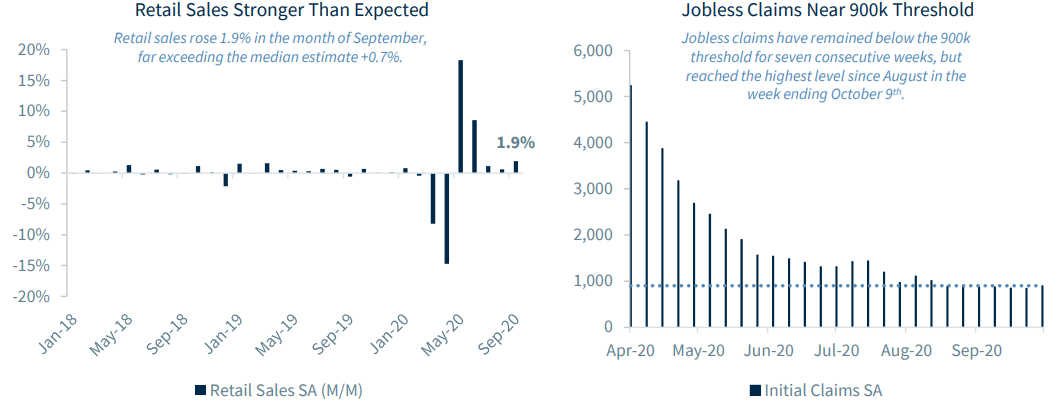

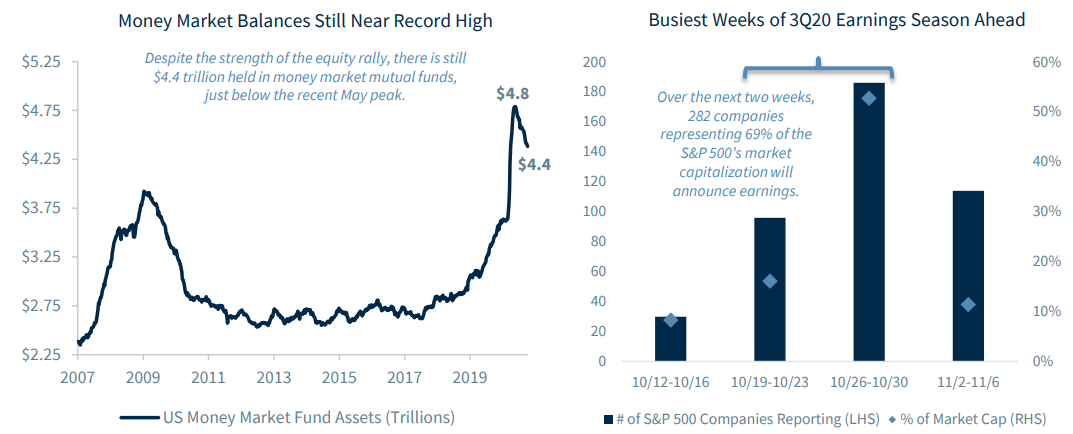

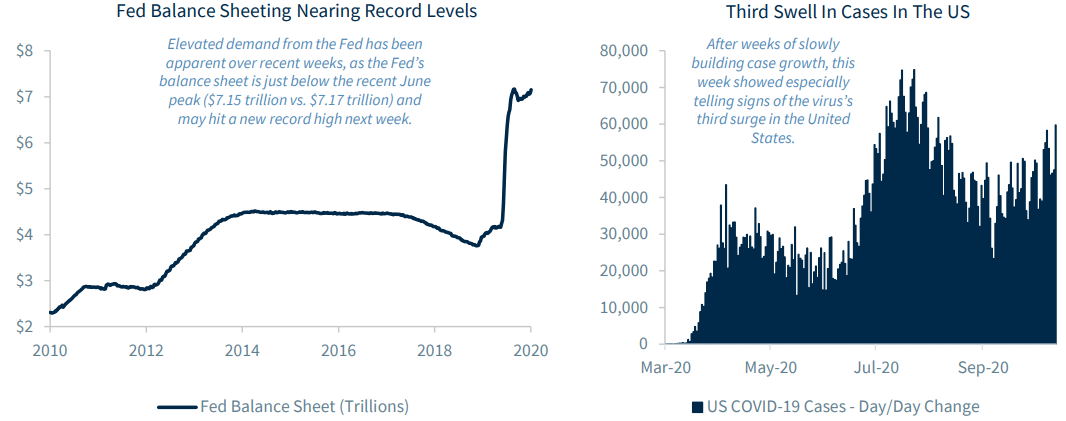

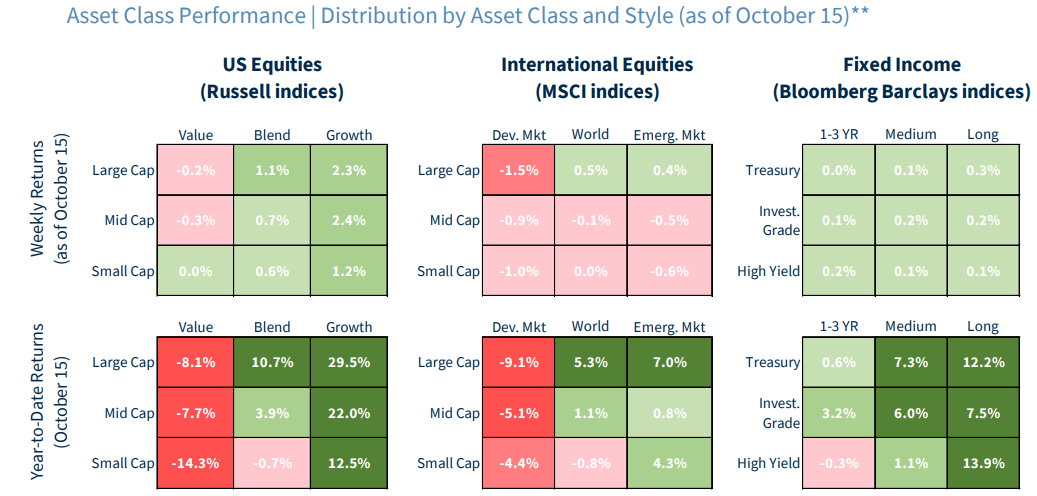

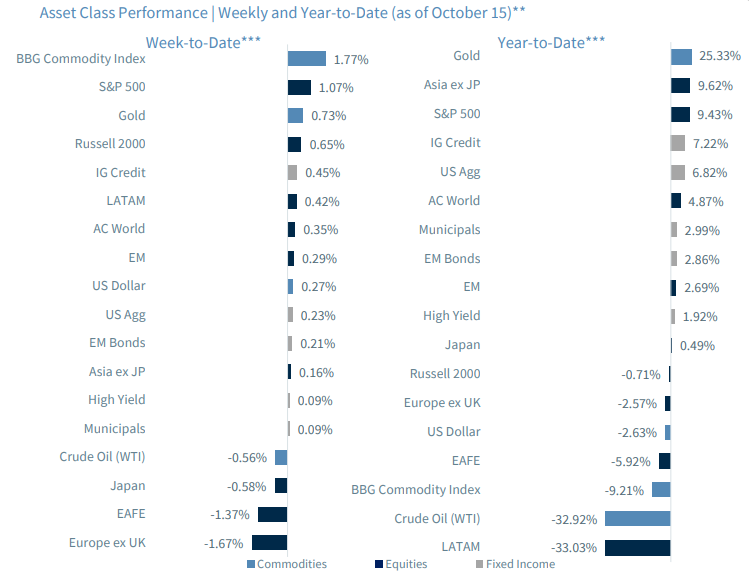

[Back to Table of Contents](#content)

<a id ="eco"></a>

## Key Economic Events Next Week 

In [30]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/economic-calendar/" rel="noopener" target="_blank"><span class="blue-text">Economic Calendar</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-events.js" async>
  {
  "colorTheme": "light",
  "isTransparent": false,
  "width": "700",
  "height": "600",
  "locale": "en",
  "importanceFilter": "0,1"
}
  </script>
</div>
<!-- TradingView Widget END --> """)

[Back to Table of Contents](#content)